## Name : Saurabh Sunil Bagade
## Roll No : DS24MS31

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_email_campaign.csv')
df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


In [5]:
df.shape

(68353, 12)

In [6]:
df = df.drop(columns=['Email_ID'])

# Data Cleaning

In [7]:
df.isna().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [8]:
df['Customer_Location'] = df['Customer_Location'].fillna('Unknown')

In [9]:
df = df.dropna(subset=['Total_Past_Communications', 'Total_Links','Total_Images'])

In [10]:
df.isna().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [11]:
df.shape

(58091, 11)

- The number of columns has not decreased drastically so we can continue with next steps

# EDA

In [12]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,Unknown,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [13]:
for i in df.columns:
    print(f"Unique values for column {i} :\nNo of Unique values is {df[i].nunique()}\n{df[i].unique()}\n \n")


Unique values for column Email_Type :
No of Unique values is 2
[1 2]
 

Unique values for column Subject_Hotness_Score :
No of Unique values is 51
[2.2 2.1 0.1 3.  0.  3.2 0.7 0.5 0.2 1.  1.9 1.6 0.3 1.1 2.3 1.4 0.8 0.6
 4.2 1.8 1.7 2.4 0.9 3.3 2.8 2.6 3.1 1.3 4.1 2.9 1.5 2.7 0.4 1.2 2.  3.7
 2.5 3.8 4.6 4.5 3.6 3.4 3.5 4.4 4.7 5.  3.9 4.3 4.  4.8 4.9]
 

Unique values for column Email_Source_Type :
No of Unique values is 2
[2 1]
 

Unique values for column Customer_Location :
No of Unique values is 8
['E' 'Unknown' 'B' 'C' 'G' 'D' 'F' 'A']
 

Unique values for column Email_Campaign_Type :
No of Unique values is 3
[2 3 1]
 

Unique values for column Total_Past_Communications :
No of Unique values is 64
[33. 15. 36. 25. 18. 34. 21. 40. 27. 24. 42. 23. 37. 35. 51.  9. 39. 31.
 50. 30. 14. 53. 28.  7. 52. 22. 43. 16. 11. 20. 41. 45. 56. 26. 29.  5.
 32. 44. 10. 38. 46. 17. 47. 48.  8. 49.  0.  6. 55. 19. 60. 59. 13. 12.
 54. 62. 57. 58. 65. 61. 66. 67. 63. 64.]
 

Unique values for column

In [14]:
df['Customer_Location'].value_counts()

Customer_Location
G          19756
Unknown     9800
E           8660
D           6257
C           4893
F           3771
B           3726
A           1228
Name: count, dtype: int64

In [15]:
df['Total_Past_Communications'] = df['Total_Past_Communications'].astype(int)
df['Total_Images'] = df['Total_Images'].astype(int)

In [16]:
df['Customer_Location'] = df['Customer_Location'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58091 entries, 0 to 68352
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Email_Type                 58091 non-null  int64   
 1   Subject_Hotness_Score      58091 non-null  float64 
 2   Email_Source_Type          58091 non-null  int64   
 3   Customer_Location          58091 non-null  category
 4   Email_Campaign_Type        58091 non-null  int64   
 5   Total_Past_Communications  58091 non-null  int32   
 6   Time_Email_sent_Category   58091 non-null  int64   
 7   Word_Count                 58091 non-null  int64   
 8   Total_Links                58091 non-null  float64 
 9   Total_Images               58091 non-null  int32   
 10  Email_Status               58091 non-null  int64   
dtypes: category(1), float64(2), int32(2), int64(6)
memory usage: 4.5 MB


## Visualize

### Univariate Analysis

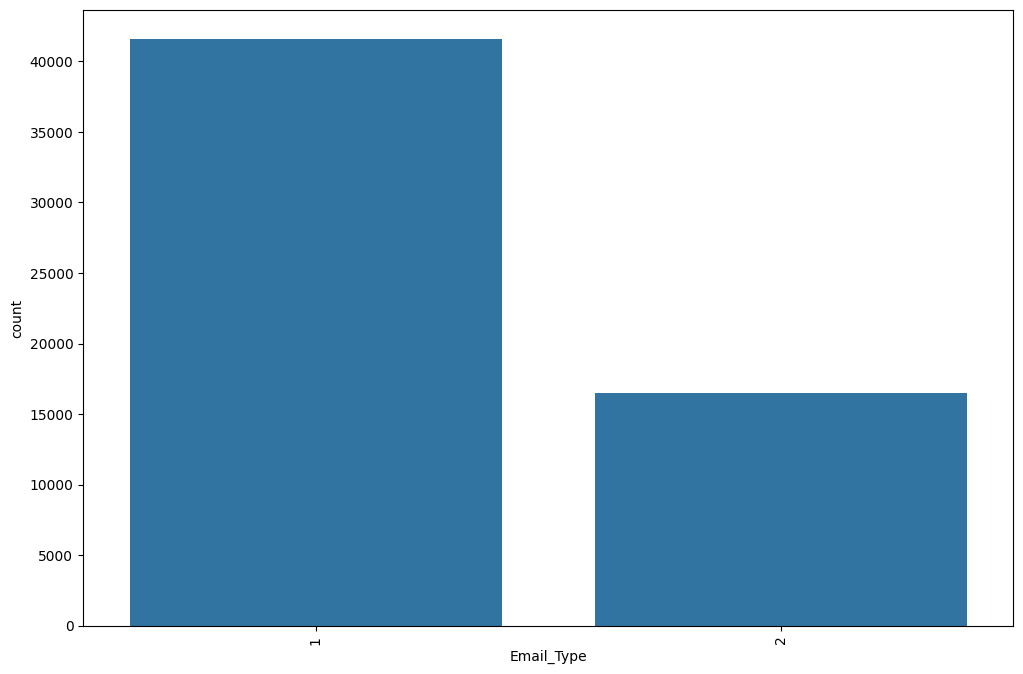

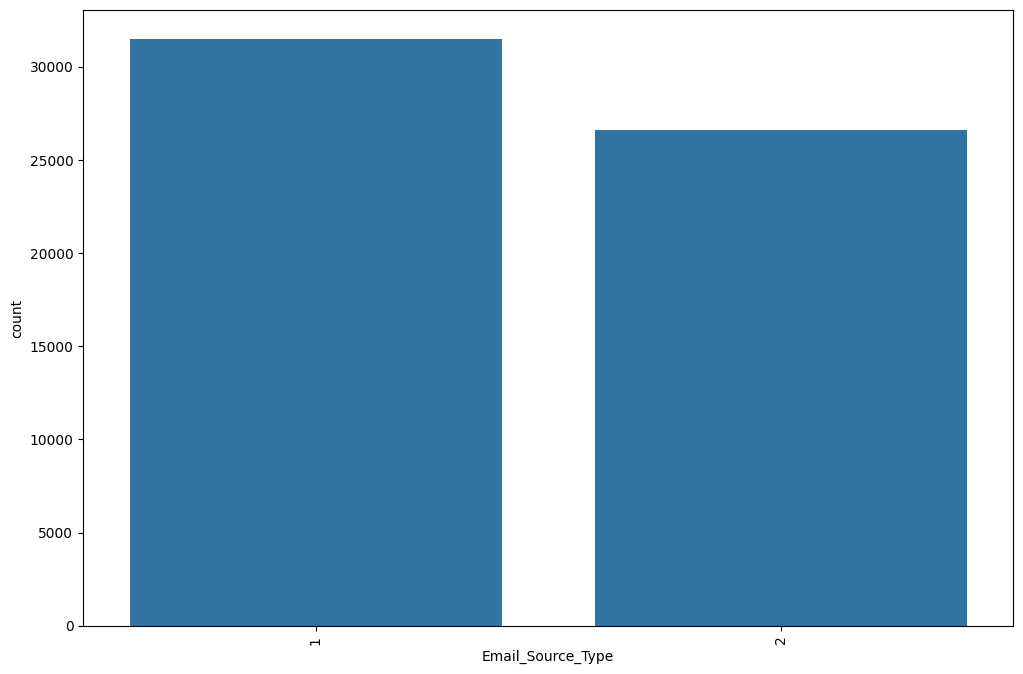

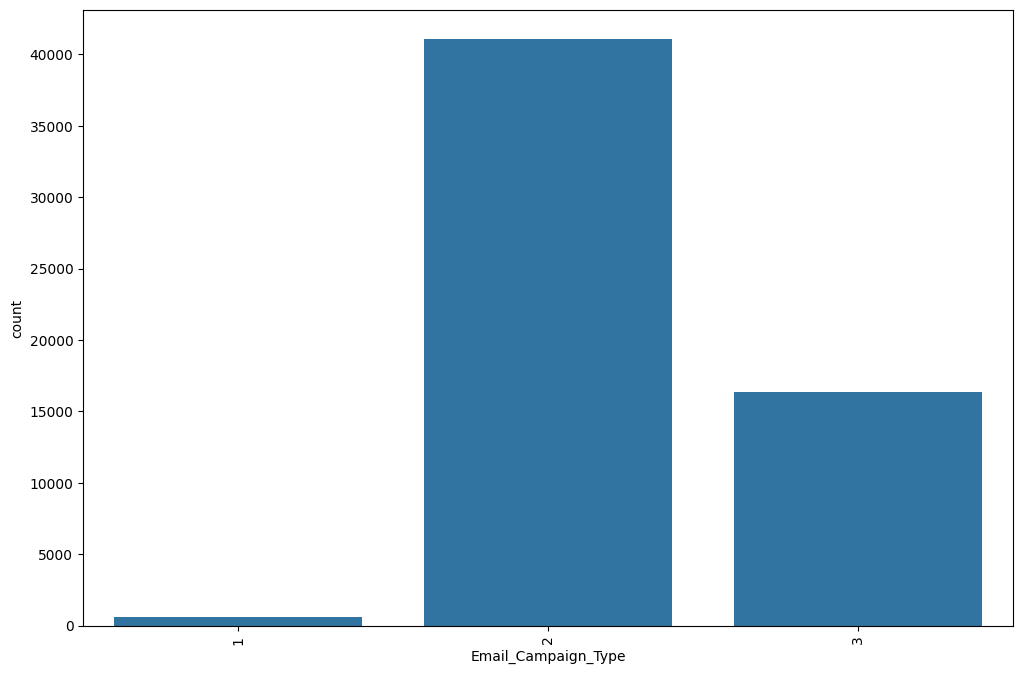

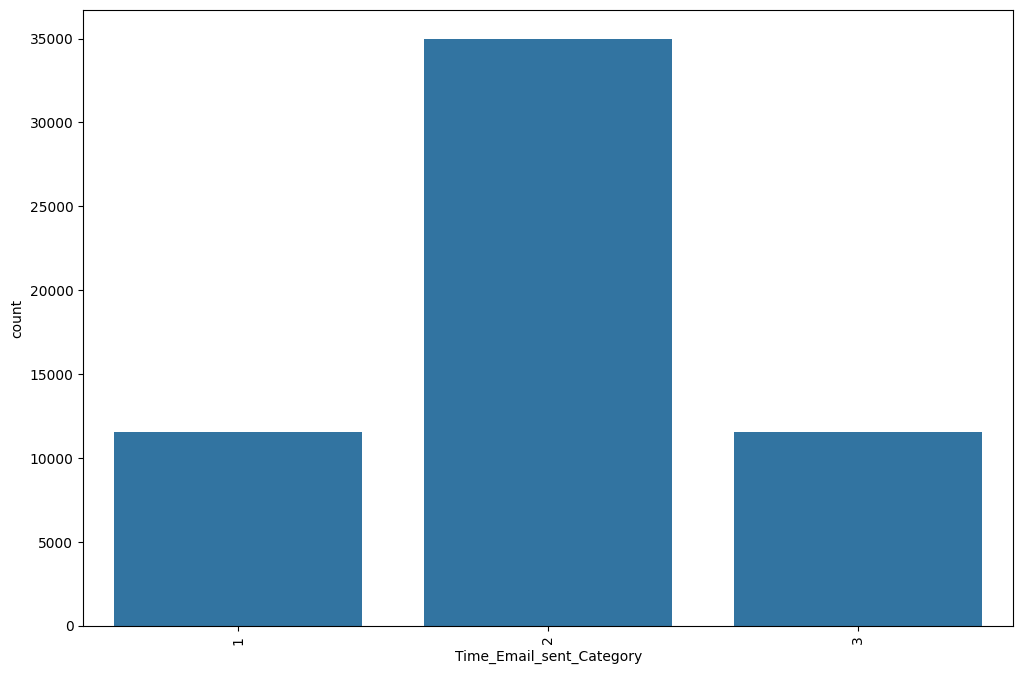

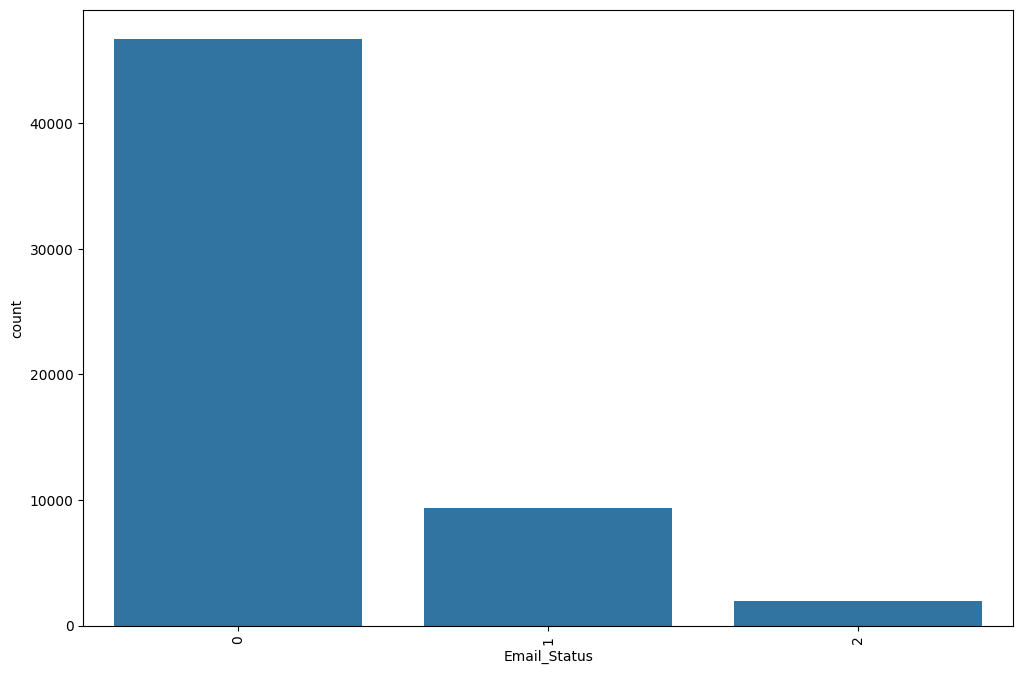

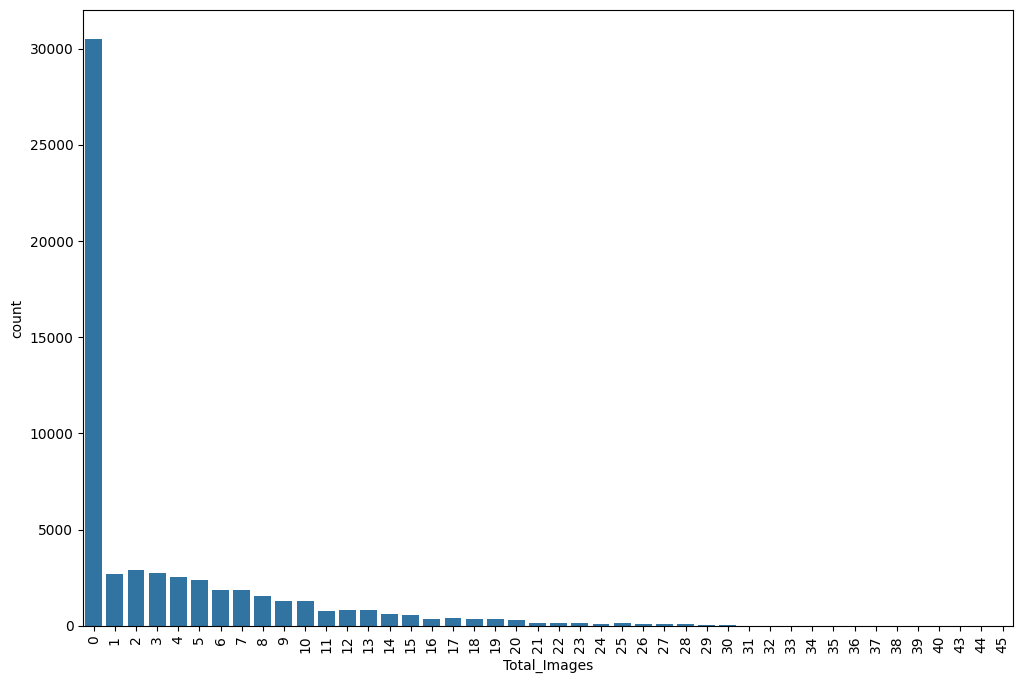

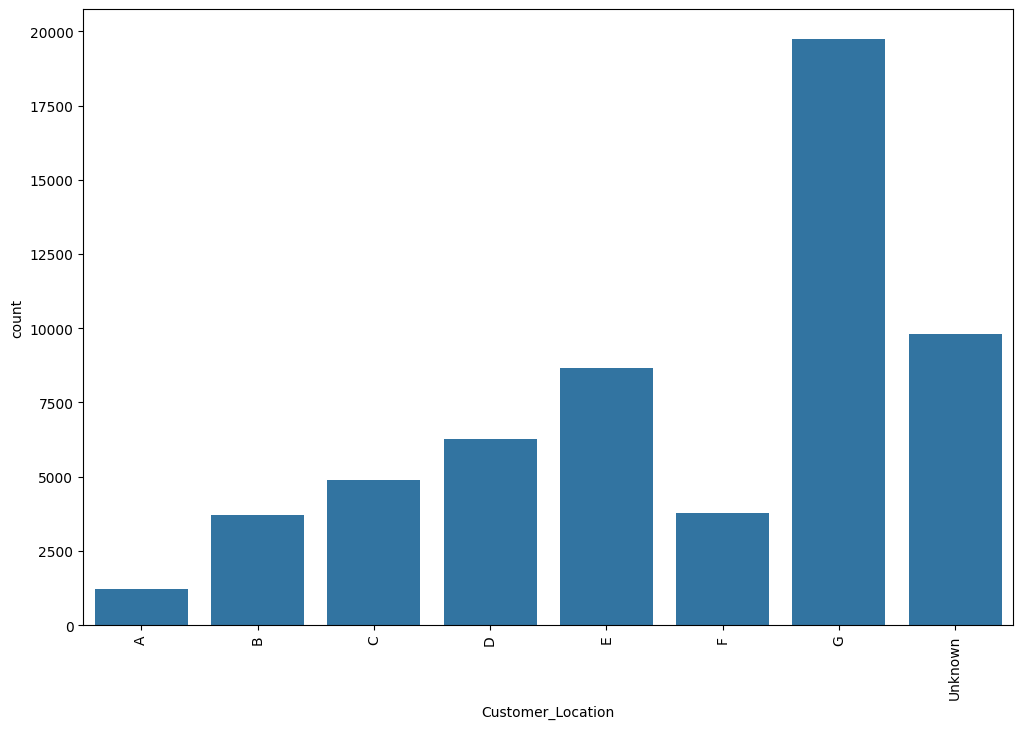

In [18]:
for i in ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status', 'Total_Images', 'Customer_Location']:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

- Data is dominated by the email type 1
- Email Source Type is fairly balanced
- The Data has many emails of campaign type 2
- Email are generally sent during the 2 shift of the day
- The emails are generally ignored in this dataset
- Most of the emails do not have a image
- The most dominant locations of customers is G

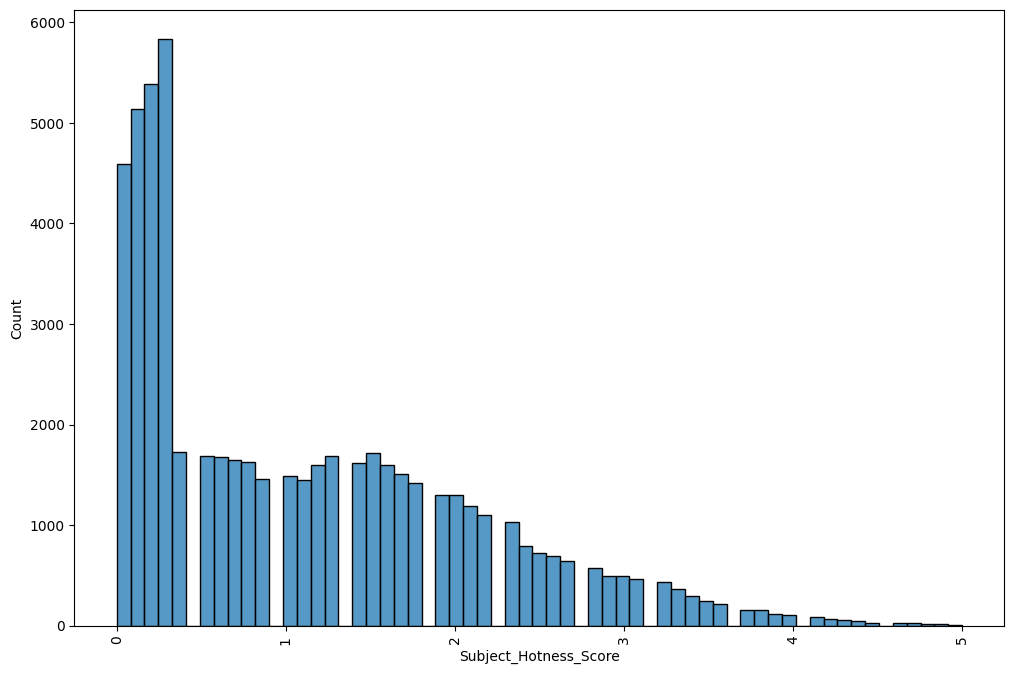

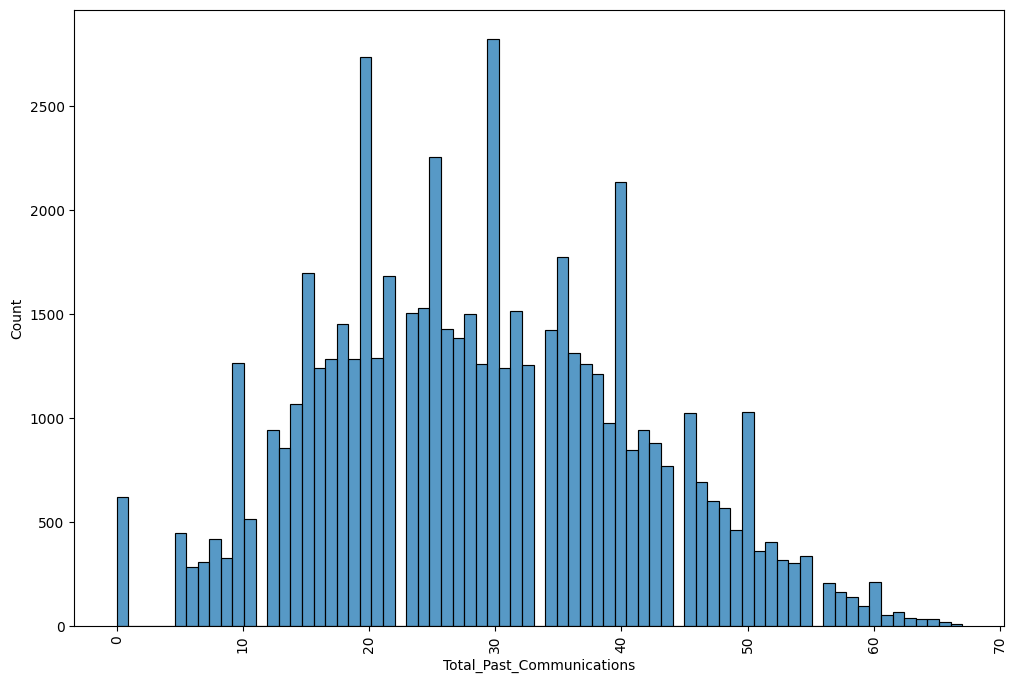

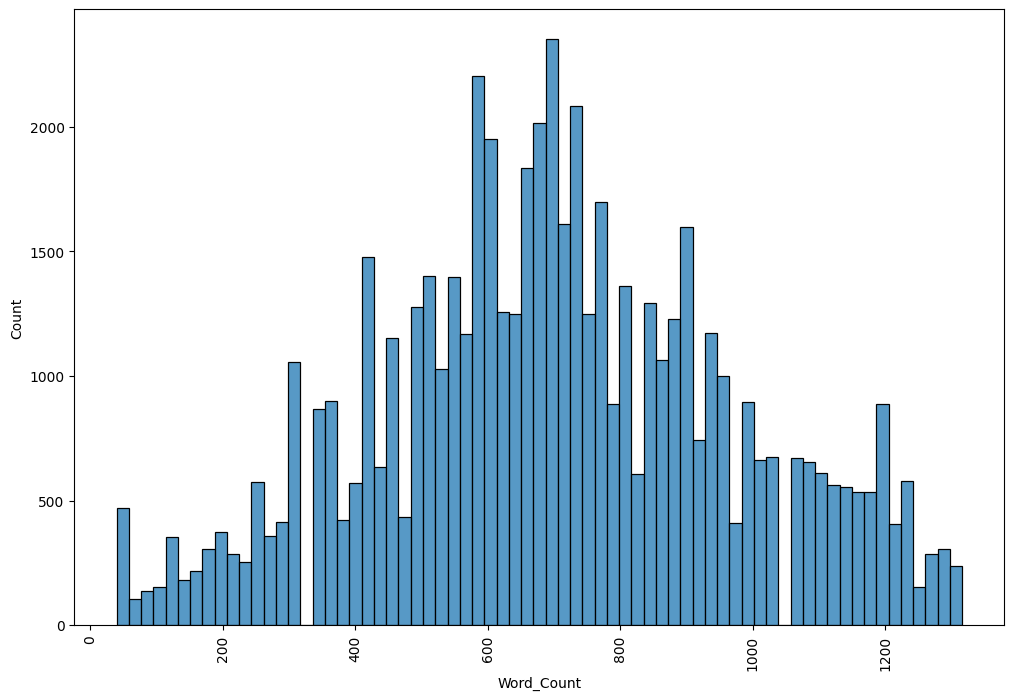

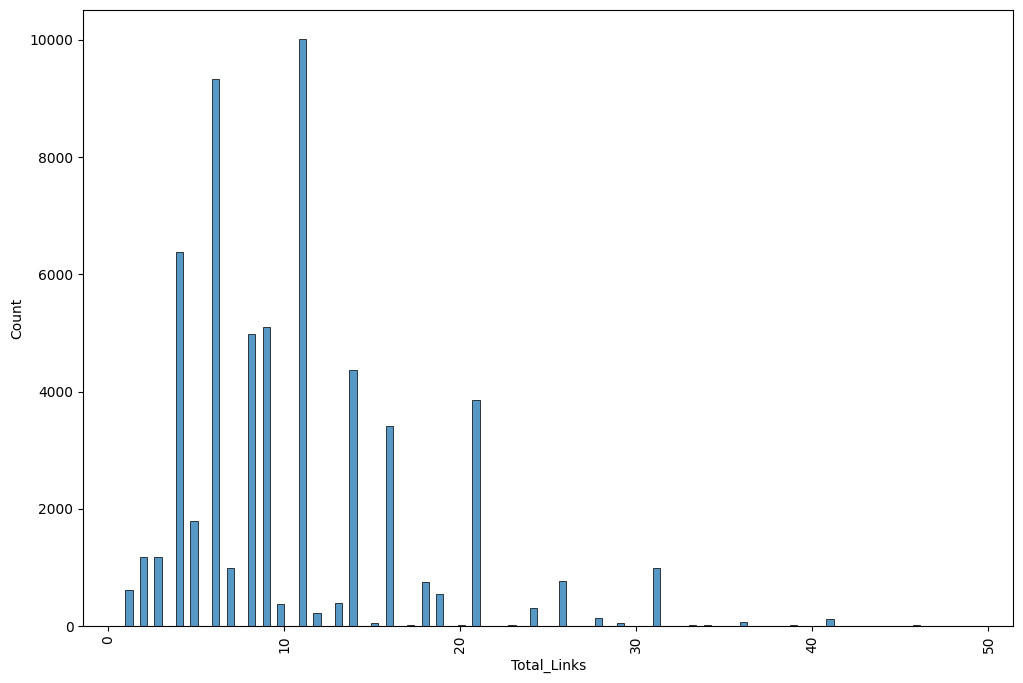

In [19]:
for i in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Total_Links']:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

- Subject hotness is pretty less for most emails
- Total Past communications is normally distributed
- Word count is also fairly normal
- Total links has no peculiar distribution but shows a right skewed distribution. ( Maybe log normal )

### Bivariate Analysis

In [20]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33,1,440,8.0,0,0
1,2,2.1,1,Unknown,2,15,2,504,5.0,0,0
2,2,0.1,1,B,3,36,2,962,5.0,0,1
3,1,3.0,2,E,2,25,2,610,16.0,0,0
4,1,0.0,2,C,3,18,2,947,4.0,0,0


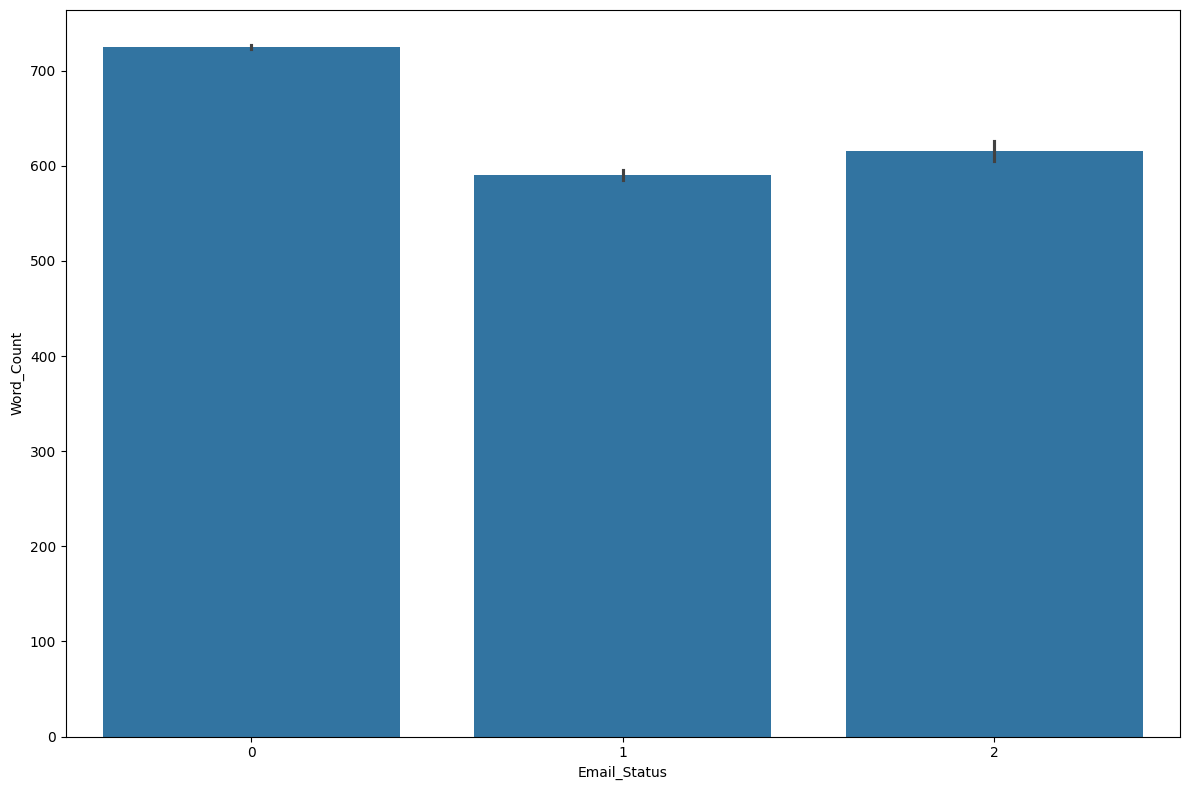

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(df, x='Email_Status', y = 'Word_Count')
plt.tight_layout()
plt.show()

- The emails which are ignored have the highest word count.
- The emails which are read have a low word count
- This means users tend to read only short emails

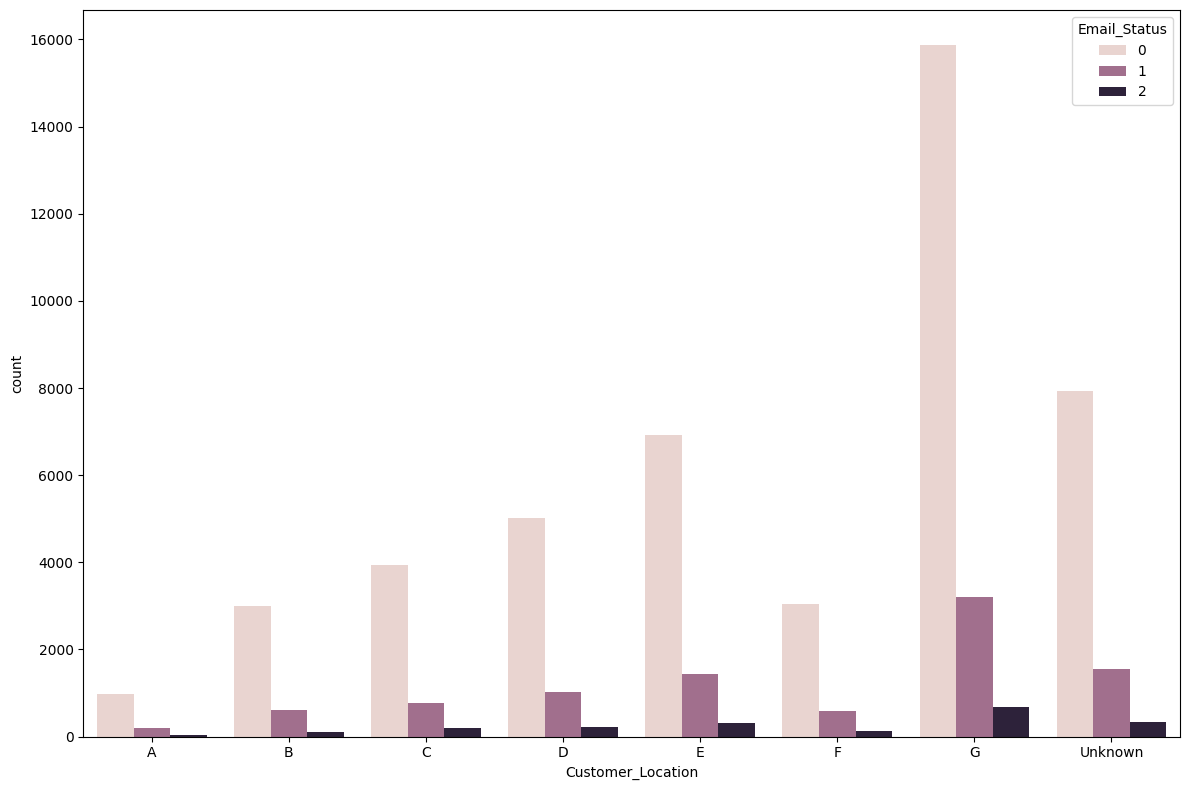

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Customer_Location', hue='Email_Status')
plt.tight_layout()
plt.show()

- Almost all emails from all locations are ignored

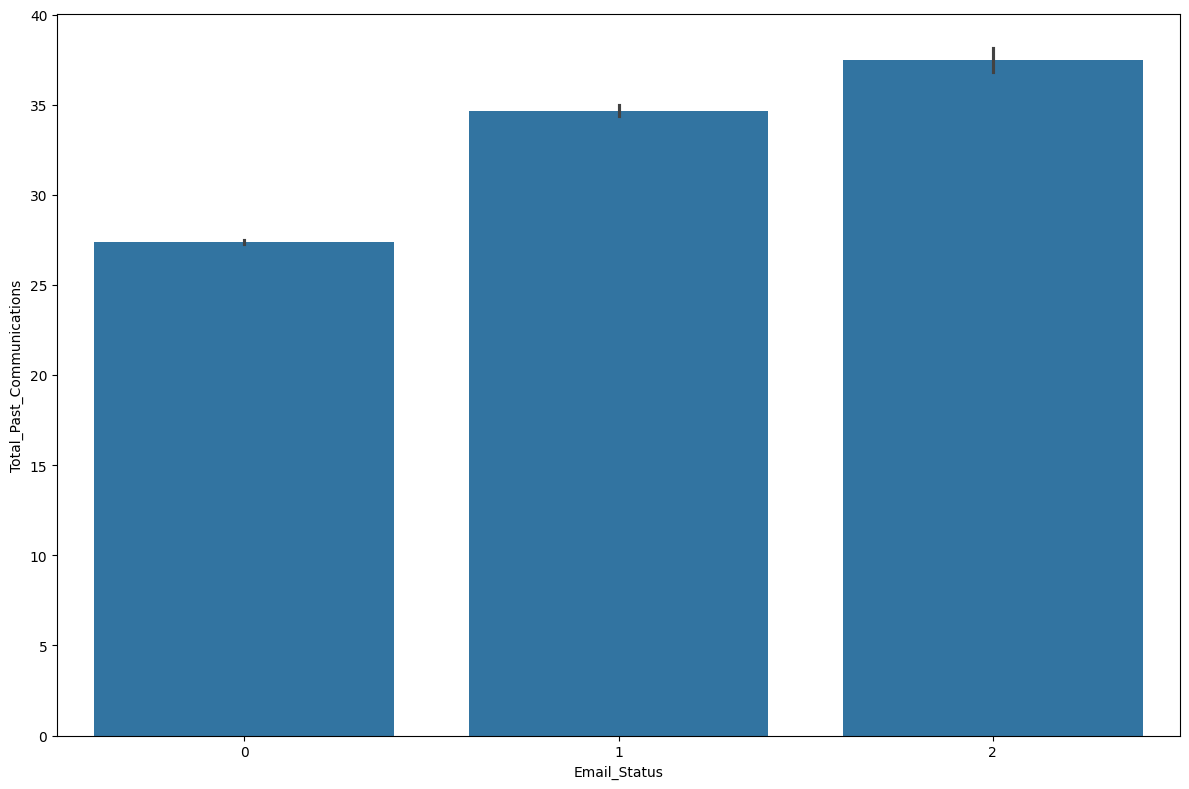

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(df, y='Total_Past_Communications', x = 'Email_Status')
plt.tight_layout()
plt.show()

- Emails which are acknowledged by the user have a high past communication number

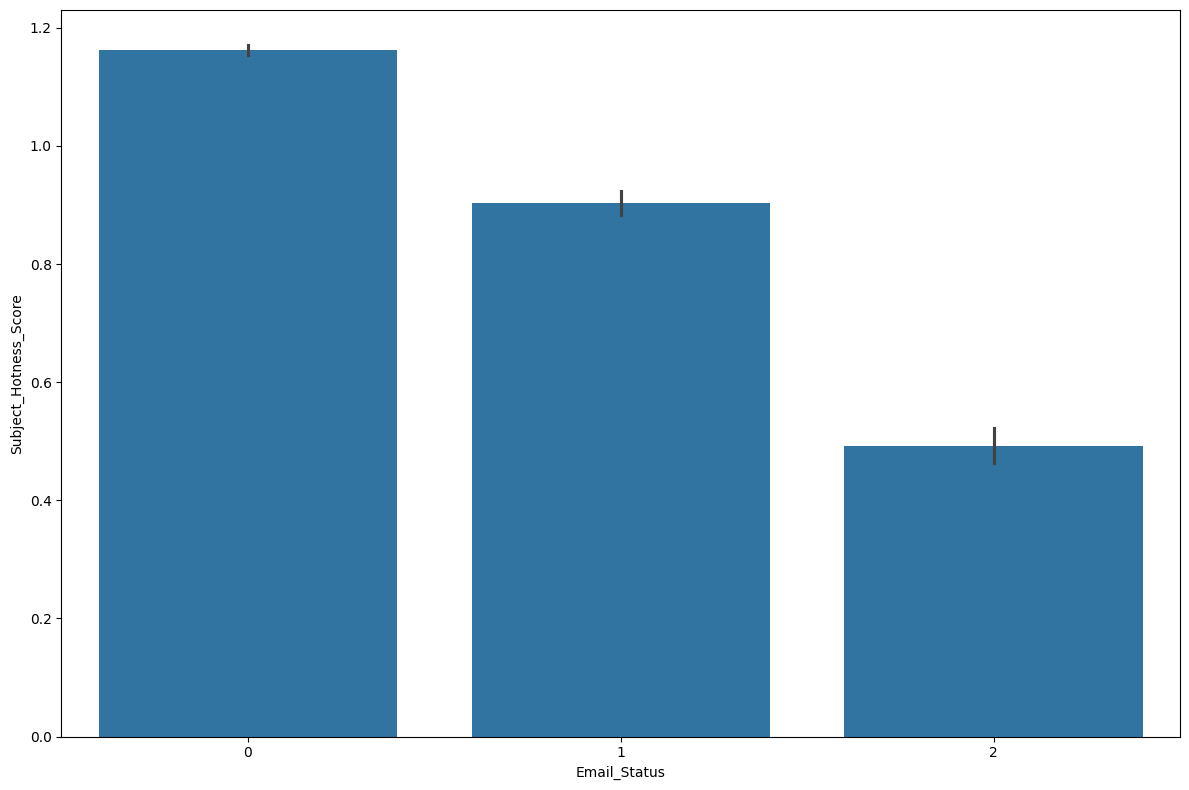

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(df, y='Subject_Hotness_Score', x = 'Email_Status')
plt.tight_layout()
plt.show()

- Generally company or promotional emails have a very good content so their hotmess score becomes high. Also users tend to ignore this messages.
- Mails which are acknowledged have a low hotness score

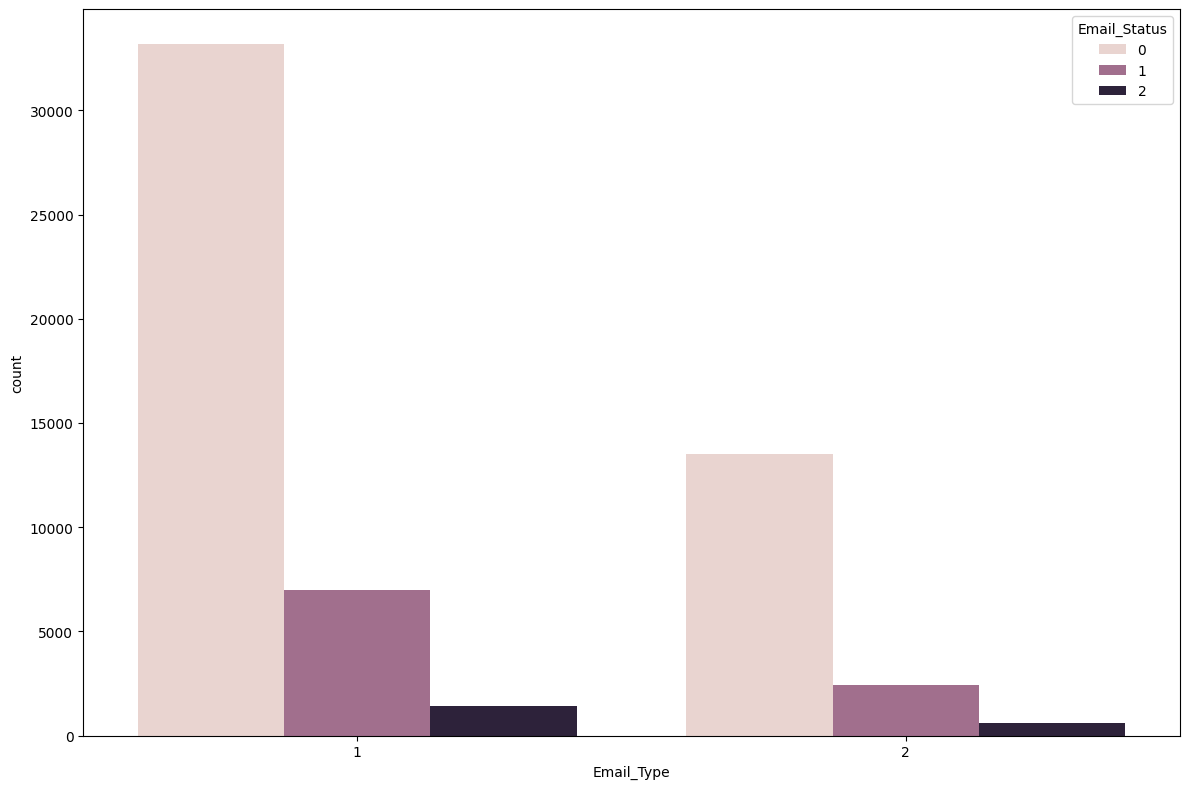

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Email_Type', hue='Email_Status')
plt.tight_layout()
plt.show()

- Email type 1 has highest ignored mails and also highest read mails

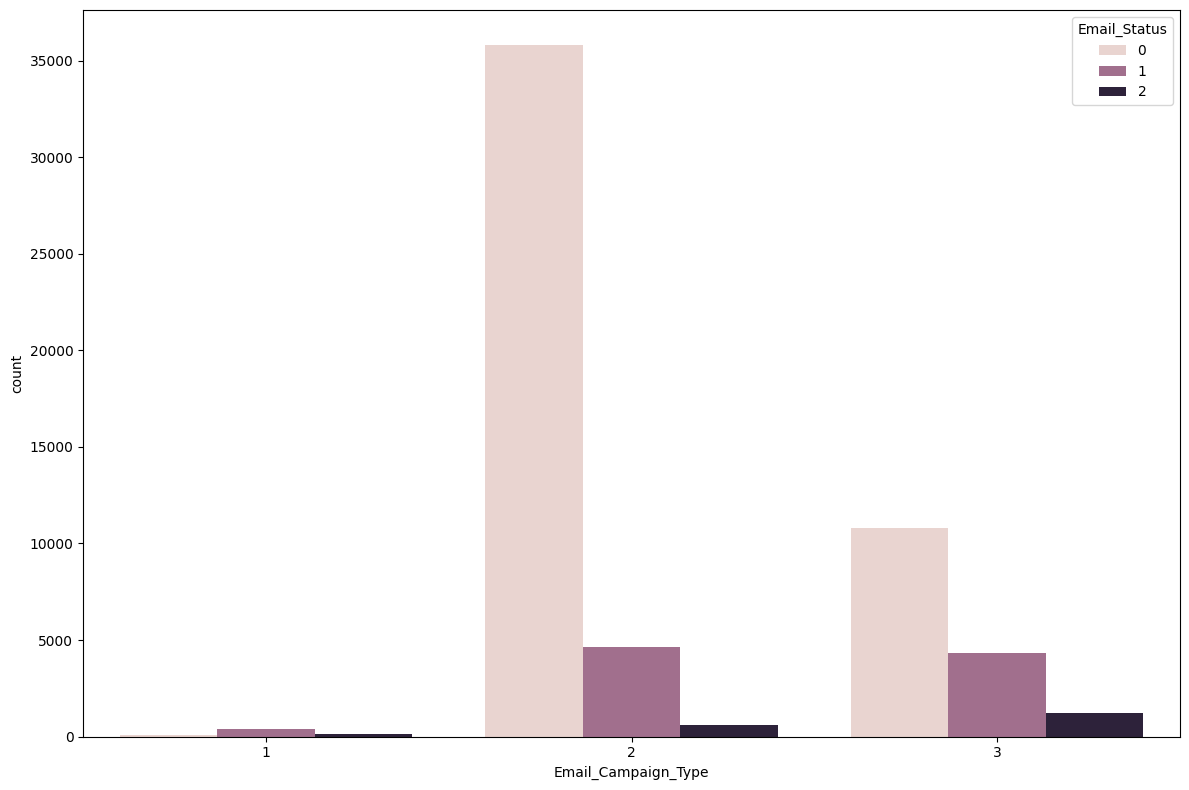

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Email_Campaign_Type', hue='Email_Status')
plt.tight_layout()
plt.show()

- Comparatively campaign 1 has very low ignored messages as compared to read and acknowledged. This is a sign of successful campaign.
- Campaign 2 has highest ignored mails. Showing a failed campaign.

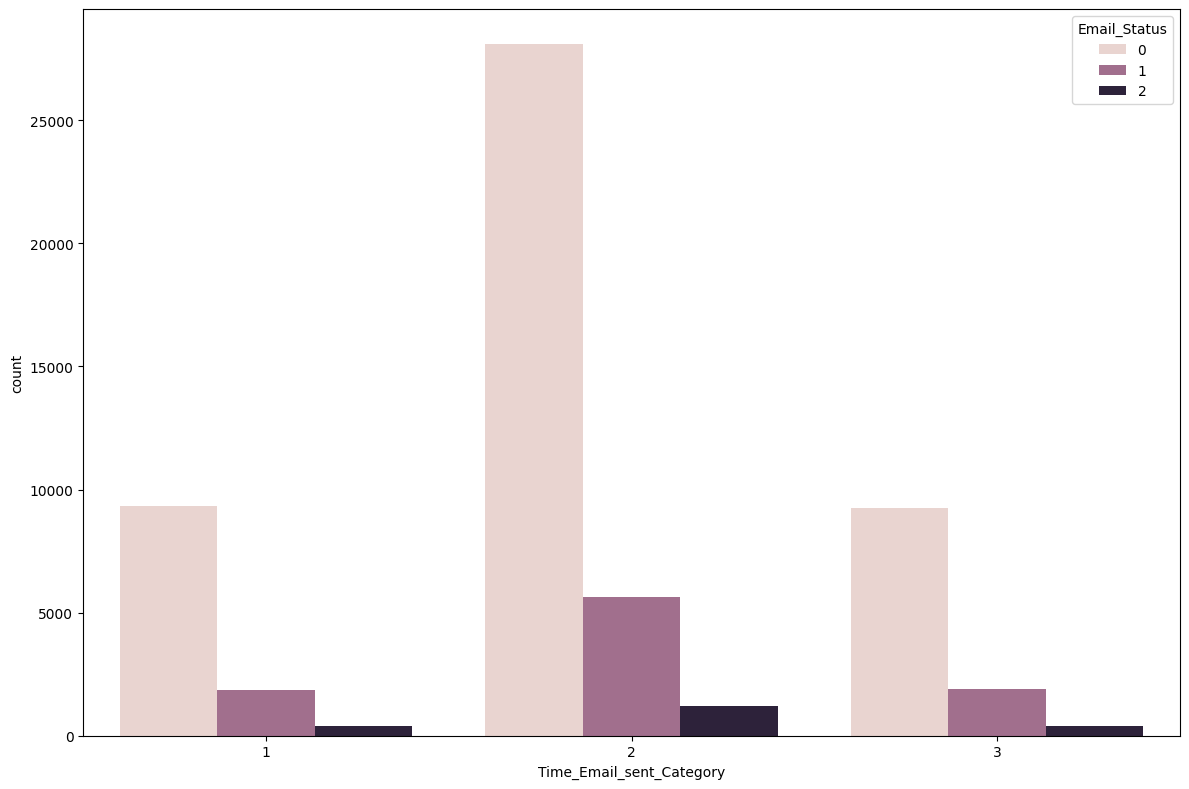

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Time_Email_sent_Category', hue='Email_Status')
plt.tight_layout()
plt.show() 

### Multivariate Analysis

In [28]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33,1,440,8.0,0,0
1,2,2.1,1,Unknown,2,15,2,504,5.0,0,0
2,2,0.1,1,B,3,36,2,962,5.0,0,1
3,1,3.0,2,E,2,25,2,610,16.0,0,0
4,1,0.0,2,C,3,18,2,947,4.0,0,0


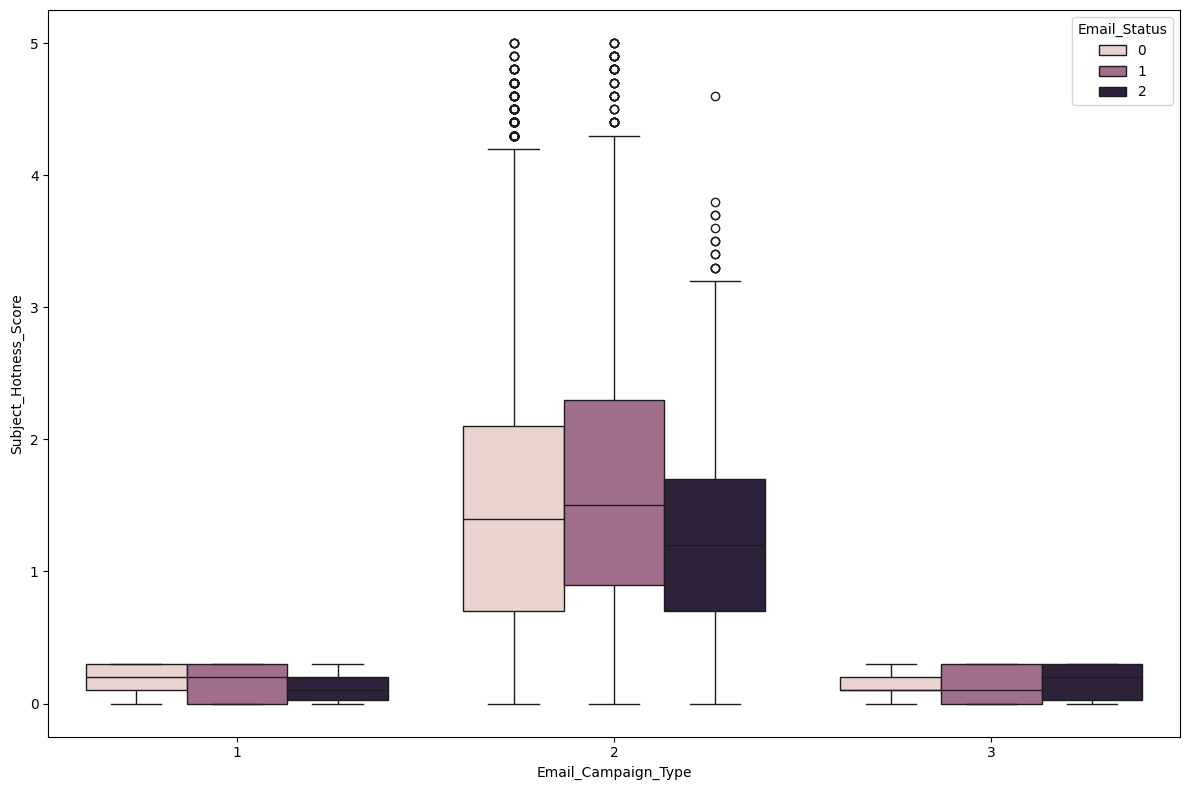

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(df, y='Subject_Hotness_Score',x='Email_Campaign_Type' ,hue = 'Email_Status')
plt.tight_layout()
plt.show()

- Emails in Campaign 2 which are read have highest subject score
- Emails in campaign 1 which are acknowledge have lowest subject score

In [30]:
# sns.pairplot(df, hue='Email_Status')

### Correlation Analysis

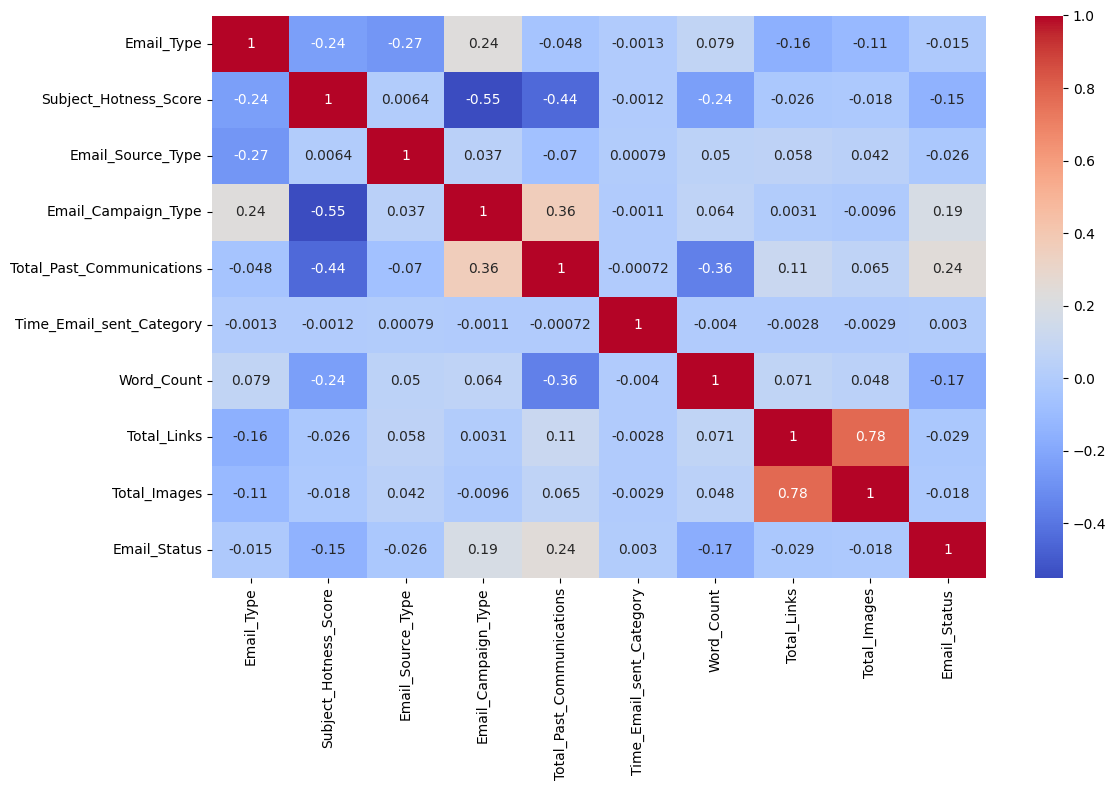

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

- Total Links and Total Images have highest correlation
- Subject Score and Campaign type have lowest correlation score

## Outlier Treatment

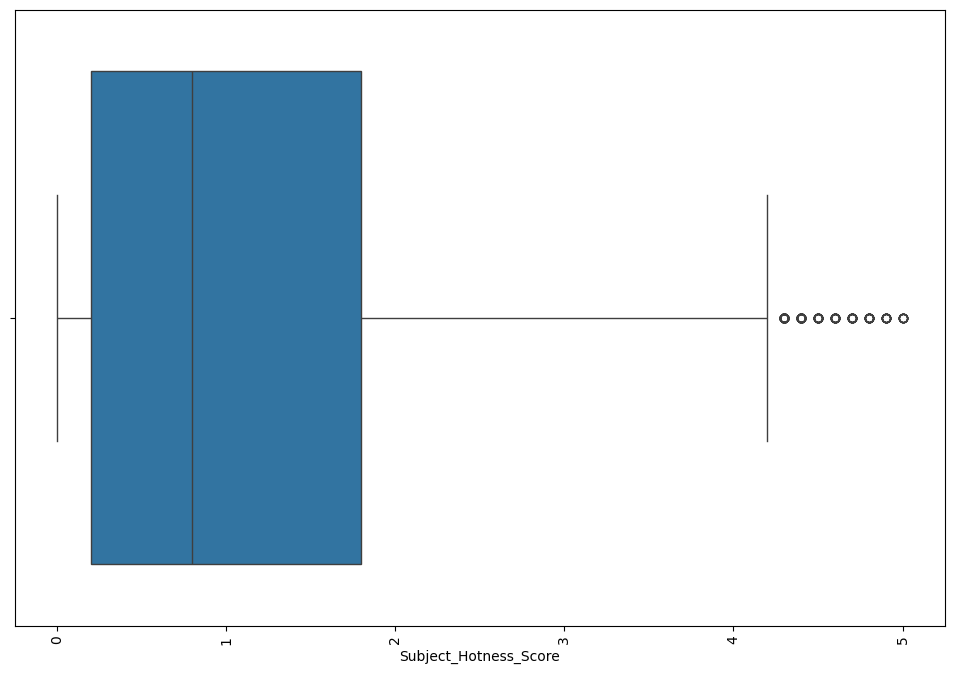

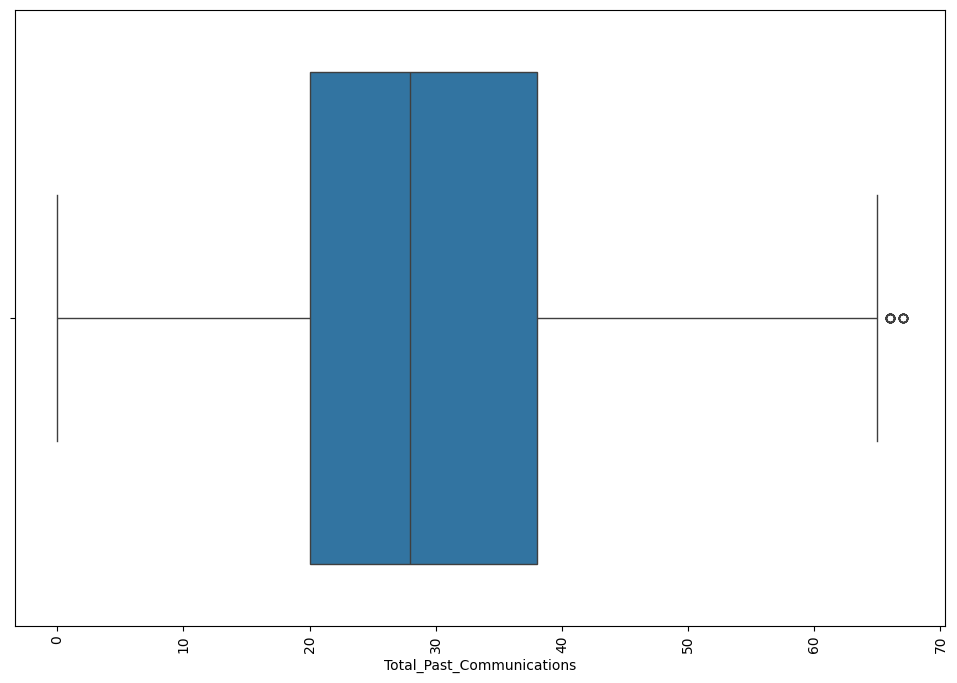

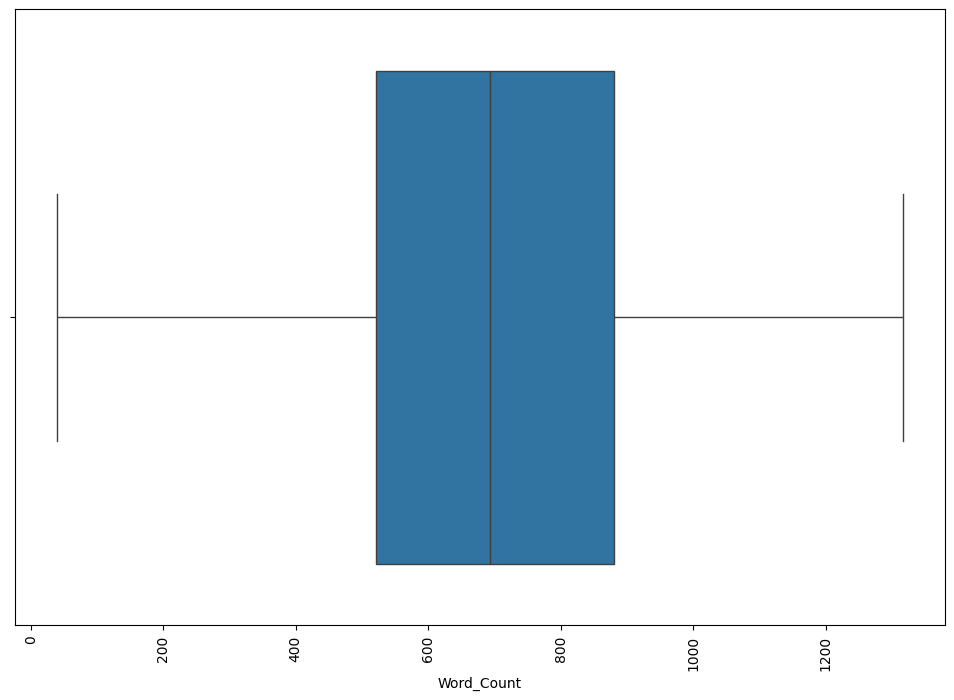

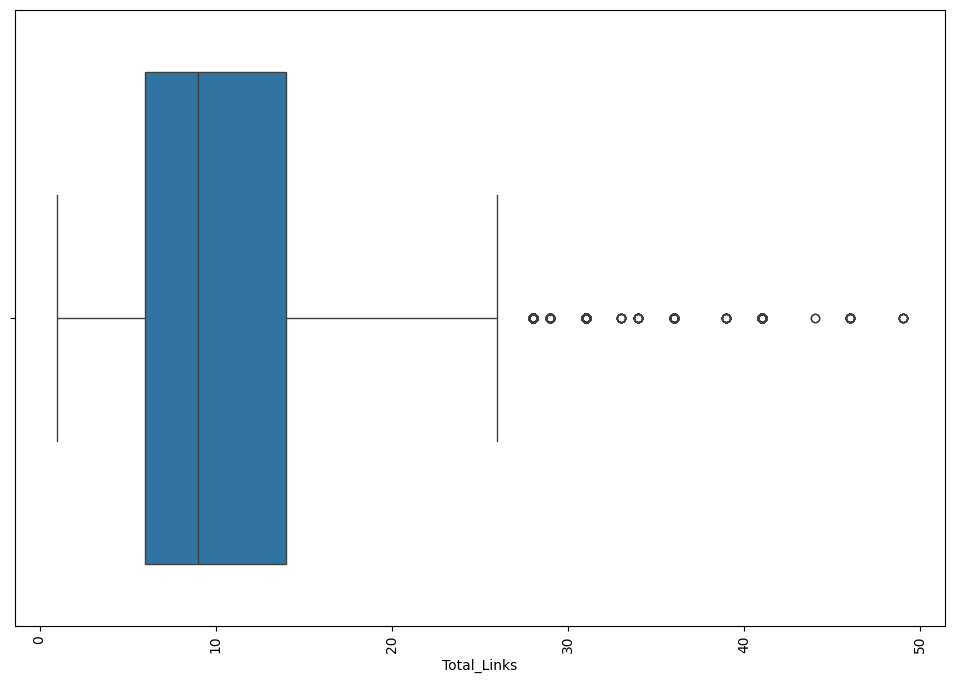

In [32]:
for i in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Total_Links']:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

In [33]:
df[df['Total_Links'].quantile(0.97) < df['Total_Links']]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
24,1,2.3,2,E,2,18,2,649,31.0,28,0
107,1,0.2,1,G,3,44,1,904,28.0,21,1
161,1,2.0,1,G,2,23,2,1157,41.0,25,0
179,1,0.8,1,B,2,30,2,636,41.0,24,0
226,1,1.6,1,B,2,33,2,424,31.0,25,1
...,...,...,...,...,...,...,...,...,...,...,...
68243,1,2.0,2,G,2,21,2,1014,31.0,18,0
68255,1,0.3,2,B,3,46,3,655,31.0,21,2
68264,1,1.4,1,D,2,40,1,653,29.0,28,0
68291,1,0.2,1,G,3,26,2,966,31.0,22,0


- Removing Outliers from Total Images is like manipulating the data
- So we let is be like that

In [34]:
df[4.2 < df['Subject_Hotness_Score']]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
426,1,4.6,2,G,2,10,3,132,6.0,0,0
481,2,4.5,1,Unknown,2,20,1,233,31.0,14,1
699,1,4.4,1,Unknown,2,21,2,40,9.0,0,0
987,1,4.7,2,E,2,14,2,40,31.0,26,0
991,1,5.0,2,E,2,10,2,40,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
66431,2,4.5,1,G,2,12,2,314,4.0,0,0
66551,1,4.3,1,Unknown,2,12,2,233,5.0,3,0
66760,1,4.4,1,A,2,17,2,152,6.0,0,0
66823,1,4.3,1,G,2,14,2,565,6.0,0,0


- Subject Hotness Score also carries important info so we do not remove outliers from it

# Distributions and Transformations

### Distributions

In [35]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Total_Links']:
    print(f"Skewness for {col} is: {df[col].skew()}")
    print(f"Kurtosis for {col} is: {df[col].kurt()}")
    print()

Skewness for Subject_Hotness_Score is: 0.894654755527627
Kurtosis for Subject_Hotness_Score is: 0.07252187000266552

Skewness for Total_Past_Communications is: 0.21486030489881572
Kurtosis for Total_Past_Communications is: -0.4352037462386109

Skewness for Word_Count is: 0.013929153087365913
Kurtosis for Word_Count is: -0.3495488036939647

Skewness for Total_Links is: 1.3835246696277361
Kurtosis for Total_Links is: 2.473000794583482



- The Subject_Hotness_Score 
+ Has near to 1 skew so it is right skewed
+ Has near to 0 kurtosis

- The Total_Past_Communications 
+ Has near to 0 skew
+ Has near to -ve kurtosis so it has flat curve

- The Word_Count 
+ Has near to 0 skew
+ Has near to -ve kurtosis so it has flat curve

- The Total_Links 
+ Has +ve skew so right skewed data
+ Has +ve kurtosis so it has peaked curve


### Transformations


- We apply the sqrt to Total Links column to make it nearly normal distribution

In [36]:
df['Total_Links'] = np.sqrt(df['Total_Links'])

<Axes: >

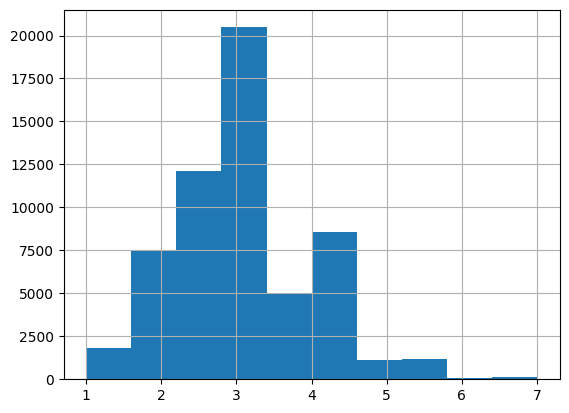

In [37]:
df['Total_Links'].hist()

# Feature Engineering

In [38]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33,1,440,2.828427,0,0
1,2,2.1,1,Unknown,2,15,2,504,2.236068,0,0
2,2,0.1,1,B,3,36,2,962,2.236068,0,1
3,1,3.0,2,E,2,25,2,610,4.000000,0,0
4,1,0.0,2,C,3,18,2,947,2.000000,0,0


In [39]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Customer_Location'], dtype='object')

In [40]:
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [41]:
df_encoded.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_Unknown
0,1,2.2,2,2,33,1,440,2.828427,0,0,False,False,False,False,True,False,False,False
1,2,2.1,1,2,15,2,504,2.236068,0,0,False,False,False,False,False,False,False,True
2,2,0.1,1,3,36,2,962,2.236068,0,1,False,True,False,False,False,False,False,False
3,1,3.0,2,2,25,2,610,4.000000,0,0,False,False,False,False,True,False,False,False
4,1,0.0,2,3,18,2,947,2.000000,0,0,False,False,True,False,False,False,False,False


# Splitting Data into Train-Test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df_encoded.drop(columns=['Email_Status'])
y = df_encoded['Email_Status']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [45]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(46472, 17) (11619, 17)
(46472,) (11619,)


# Training a Logistic Regression Model

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score

In [47]:
def model_scoring(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()    
    print(classification_report(y_test, y_pred, zero_division=1))

In [48]:
lr = LogisticRegression(
    class_weight='balanced',
    C=0.01,
    solver='saga',
    max_iter=1500,
    random_state=42
)
lr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1500,
                   random_state=42, solver='saga')

In [49]:
y_pred = lr.predict(x_test)

In [50]:
df['Email_Status'].value_counts()

Email_Status
0    46697
1     9392
2     2002
Name: count, dtype: int64

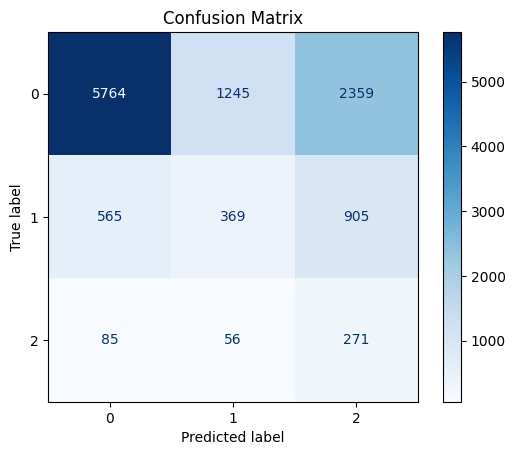

              precision    recall  f1-score   support

           0       0.90      0.62      0.73      9368
           1       0.22      0.20      0.21      1839
           2       0.08      0.66      0.14       412

    accuracy                           0.55     11619
   macro avg       0.40      0.49      0.36     11619
weighted avg       0.76      0.55      0.63     11619



In [51]:
model_scoring(y_pred, y_test)

# Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [54]:
x_train_scaled.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_Unknown
0,-0.630932,2.108798,1.088183,-0.580763,-0.549460,-0.002015,-0.260208,0.970381,1.152442,-0.147155,-0.261290,-0.303897,-0.346989,-0.420162,-0.264239,1.395635,-0.449902
1,1.584958,-0.896807,-0.918963,1.550246,0.964658,1.585021,-1.231978,-0.681253,-0.633232,-0.147155,3.827158,-0.303897,-0.346989,-0.420162,-0.264239,-0.716520,-0.449902
2,-0.630932,-0.796620,-0.918963,-2.711773,-2.302649,1.585021,0.748372,-2.225278,-0.633232,-0.147155,-0.261290,-0.303897,-0.346989,-0.420162,-0.264239,1.395635,-0.449902
3,-0.630932,2.709919,1.088183,-0.580763,-0.788531,-0.002015,-0.849159,-0.277602,-0.276097,-0.147155,-0.261290,-0.303897,-0.346989,-0.420162,-0.264239,-0.716520,2.222708
4,-0.630932,0.305435,1.088183,-0.580763,-0.071317,-0.002015,-0.455298,0.695189,-0.097530,-0.147155,-0.261290,-0.303897,-0.346989,2.380034,-0.264239,-0.716520,-0.449902


In [55]:
x_test_scaled.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_Unknown
0,-0.630932,-0.996994,1.088183,1.550246,1.841253,1.585021,-1.331363,-0.681253,-0.633232,-0.147155,3.827158,-0.303897,-0.346989,-0.420162,-0.264239,-0.716520,-0.449902
1,-0.630932,1.307303,-0.918963,-0.580763,-0.708840,-0.002015,1.326281,2.445886,3.652384,-0.147155,-0.261290,3.290584,-0.346989,-0.420162,-0.264239,-0.716520,-0.449902
2,1.584958,-1.097181,1.088183,1.550246,-0.708840,1.585021,2.242836,0.242436,-0.633232,-0.147155,-0.261290,-0.303897,-0.346989,-0.420162,-0.264239,-0.716520,2.222708
3,1.584958,-1.097181,1.088183,1.550246,0.645897,-0.002015,-0.190270,1.352687,0.795307,-0.147155,-0.261290,-0.303897,-0.346989,2.380034,-0.264239,-0.716520,-0.449902
4,-0.630932,1.006743,-0.918963,-0.580763,-0.947912,1.585021,1.403580,-0.681253,-0.633232,-0.147155,-0.261290,-0.303897,-0.346989,-0.420162,-0.264239,1.395635,-0.449902


In [56]:
lr = LogisticRegression(
    class_weight='balanced',
    C=0.1,
    solver='saga',
    max_iter=1500,
)
lr.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1500, solver='saga')

In [57]:
y_pred = lr.predict(x_test)

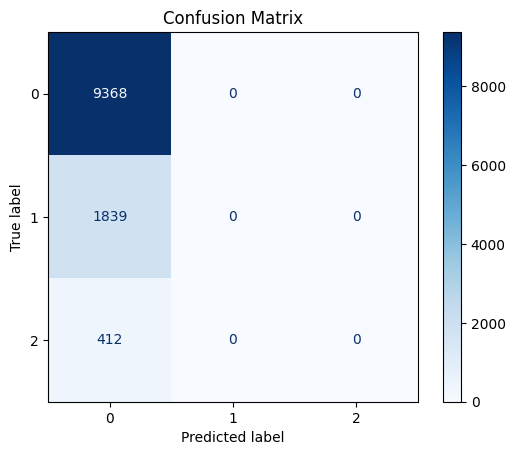

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      9368
           1       1.00      0.00      0.00      1839
           2       1.00      0.00      0.00       412

    accuracy                           0.81     11619
   macro avg       0.94      0.33      0.30     11619
weighted avg       0.84      0.81      0.72     11619



In [58]:
model_scoring(y_pred, y_test)

- Scaling is reducing the performance and only predicting the 0 class correctly so we will not use scaling

# Prediction Using Models

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Support Vector Classifier

Training Scores:


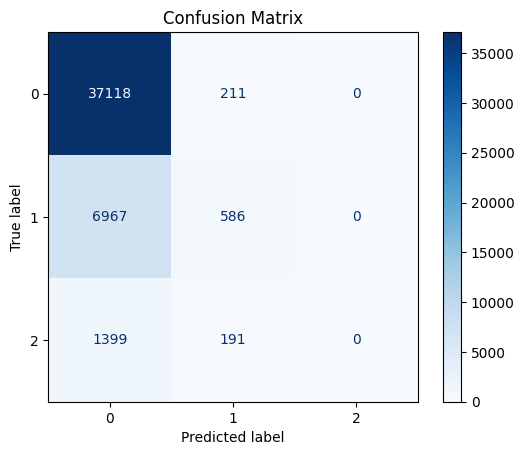

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     37329
           1       0.59      0.08      0.14      7553
           2       1.00      0.00      0.00      1590

    accuracy                           0.81     46472
   macro avg       0.80      0.36      0.34     46472
weighted avg       0.79      0.81      0.74     46472


Testing Scores:


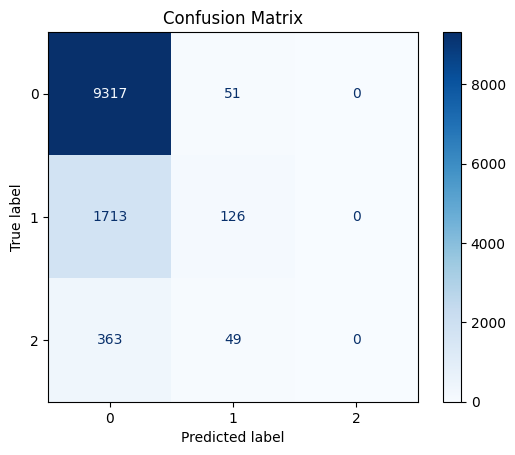

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9368
           1       0.56      0.07      0.12      1839
           2       1.00      0.00      0.00       412

    accuracy                           0.81     11619
   macro avg       0.79      0.35      0.34     11619
weighted avg       0.78      0.81      0.74     11619



In [80]:
svr_w = SVC()
svr_w.fit(x_train_scaled, y_train)

print("Training Scores:")
model_scoring(svr_w.predict(x_train_scaled), y_train)

print("\nTesting Scores:")
model_scoring(svr_w.predict(x_test_scaled), y_test)

Training Scores:


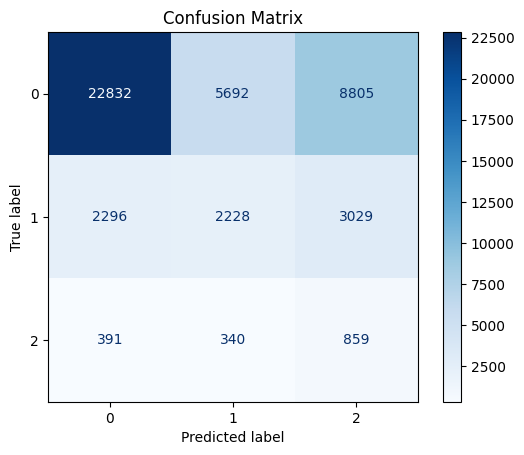

              precision    recall  f1-score   support

           0       0.89      0.61      0.73     37329
           1       0.27      0.29      0.28      7553
           2       0.07      0.54      0.12      1590

    accuracy                           0.56     46472
   macro avg       0.41      0.48      0.38     46472
weighted avg       0.76      0.56      0.63     46472


Testing Scores:


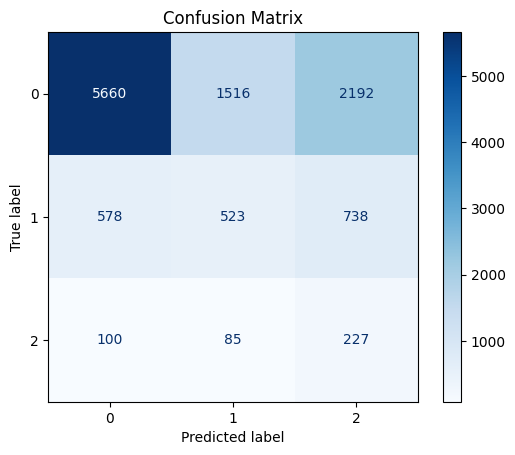

              precision    recall  f1-score   support

           0       0.89      0.60      0.72      9368
           1       0.25      0.28      0.26      1839
           2       0.07      0.55      0.13       412

    accuracy                           0.55     11619
   macro avg       0.40      0.48      0.37     11619
weighted avg       0.76      0.55      0.63     11619



In [61]:
svc = SVC(class_weight='balanced')
svc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(svc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(svc.predict(x_test), y_test)

### Decision Tree Classifier

Training Scores:


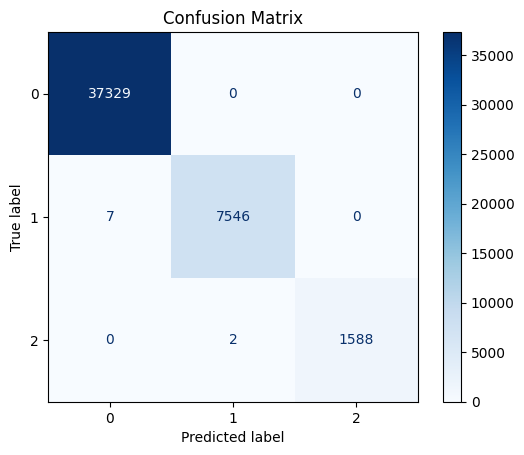

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37329
           1       1.00      1.00      1.00      7553
           2       1.00      1.00      1.00      1590

    accuracy                           1.00     46472
   macro avg       1.00      1.00      1.00     46472
weighted avg       1.00      1.00      1.00     46472


Testing Scores:


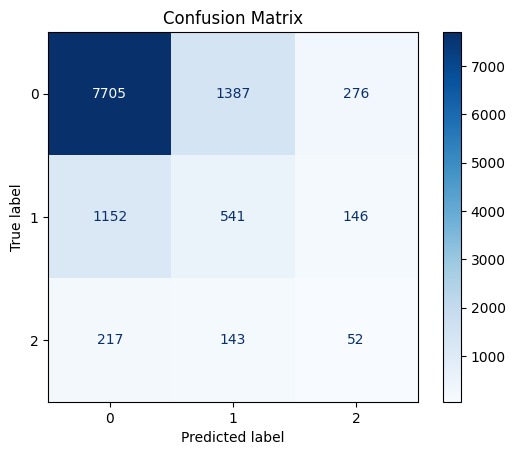

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      9368
           1       0.26      0.29      0.28      1839
           2       0.11      0.13      0.12       412

    accuracy                           0.71     11619
   macro avg       0.41      0.41      0.41     11619
weighted avg       0.73      0.71      0.72     11619



In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(dtc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(dtc.predict(x_test), y_test)

In [63]:
# dtc_params_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight':['balanced']
# }


# dtc = DecisionTreeClassifier()

# grid_search = GridSearchCV(
#     estimator=dtc,
#     param_grid=dtc_params_grid,
#     cv=5,
#     scoring='f1_weighted',
#     verbose=2,
#     n_jobs=-1    
# )

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MAE):", grid_search.best_score_)

Training Scores:


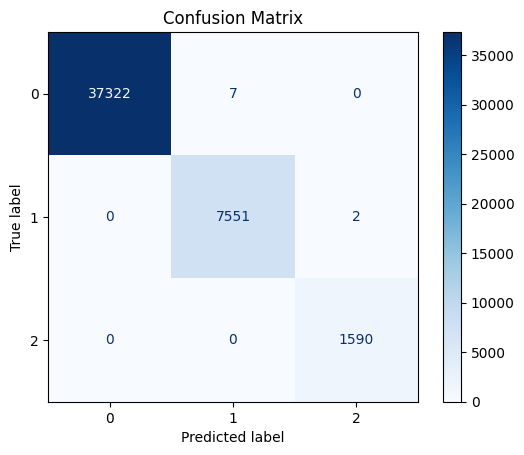

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37329
           1       1.00      1.00      1.00      7553
           2       1.00      1.00      1.00      1590

    accuracy                           1.00     46472
   macro avg       1.00      1.00      1.00     46472
weighted avg       1.00      1.00      1.00     46472


Testing Scores:


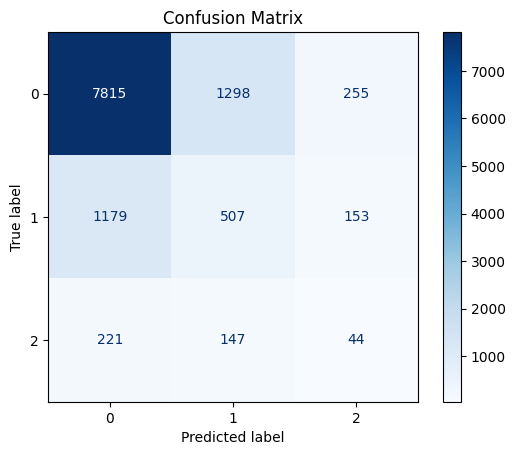

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      9368
           1       0.26      0.28      0.27      1839
           2       0.10      0.11      0.10       412

    accuracy                           0.72     11619
   macro avg       0.40      0.41      0.40     11619
weighted avg       0.73      0.72      0.72     11619



In [64]:
dtc_best_params =  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

dtc = DecisionTreeClassifier(**dtc_best_params)
dtc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(dtc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(dtc.predict(x_test), y_test)

### Random Forest Classifier

Training Scores:


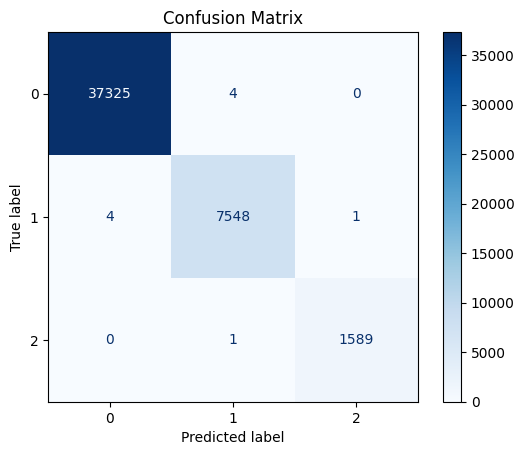

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37329
           1       1.00      1.00      1.00      7553
           2       1.00      1.00      1.00      1590

    accuracy                           1.00     46472
   macro avg       1.00      1.00      1.00     46472
weighted avg       1.00      1.00      1.00     46472


Testing Scores:


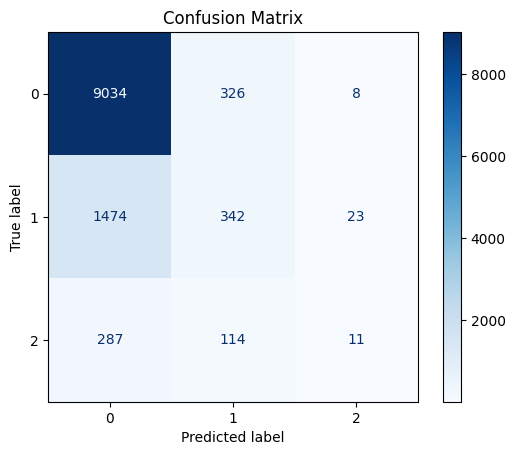

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      9368
           1       0.44      0.19      0.26      1839
           2       0.26      0.03      0.05       412

    accuracy                           0.81     11619
   macro avg       0.51      0.39      0.40     11619
weighted avg       0.75      0.81      0.77     11619



In [65]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(rfc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(rfc.predict(x_test), y_test)

In [66]:
# rfc_params_grid = {
#     'n_estimators': [100, 200],    
#     'max_depth': [10, 20, None],    
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],  
#     'max_features': ['sqrt', 'log2'],
#     'class_weight':['balanced']
# }


# rfc = RandomForestClassifier()

# grid_search = GridSearchCV(
#     estimator=rfc,
#     param_grid=rfc_params_grid,
#     cv=5,
#     scoring='f1_weighted',
#     verbose=2,
#     n_jobs=-1    
# )

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MAE):", grid_search.best_score_)

Training Scores:


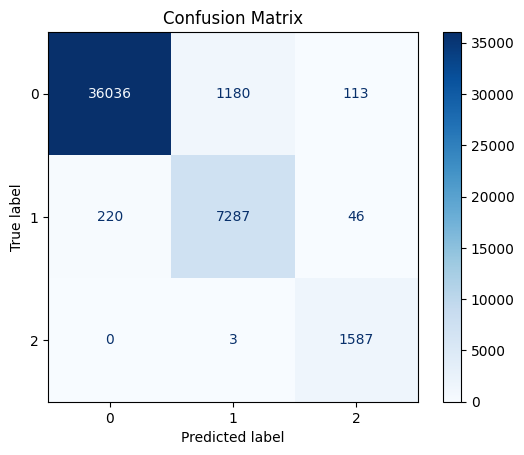

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     37329
           1       0.86      0.96      0.91      7553
           2       0.91      1.00      0.95      1590

    accuracy                           0.97     46472
   macro avg       0.92      0.98      0.95     46472
weighted avg       0.97      0.97      0.97     46472


Testing Scores:


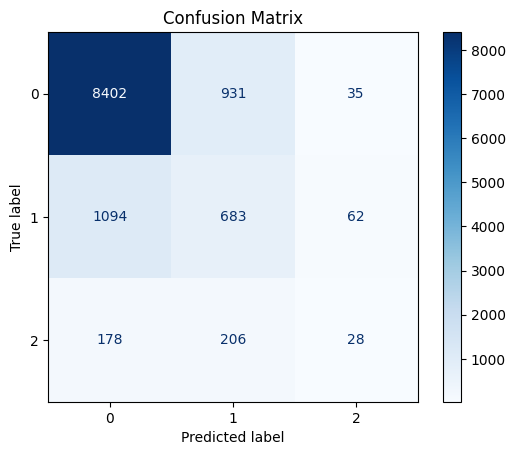

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9368
           1       0.38      0.37      0.37      1839
           2       0.22      0.07      0.10       412

    accuracy                           0.78     11619
   macro avg       0.49      0.45      0.45     11619
weighted avg       0.77      0.78      0.77     11619



In [67]:
rfc_best_params =  {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

rfc = RandomForestClassifier(**rfc_best_params)
rfc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(rfc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(rfc.predict(x_test), y_test)

### Gradient Boosting Classifier

Training Scores:


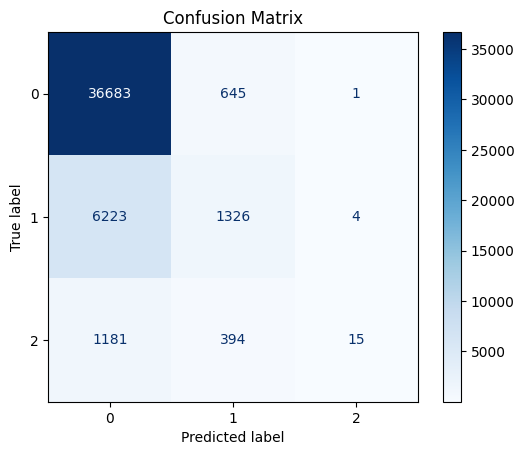

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     37329
           1       0.56      0.18      0.27      7553
           2       0.75      0.01      0.02      1590

    accuracy                           0.82     46472
   macro avg       0.71      0.39      0.40     46472
weighted avg       0.79      0.82      0.77     46472


Testing Scores:


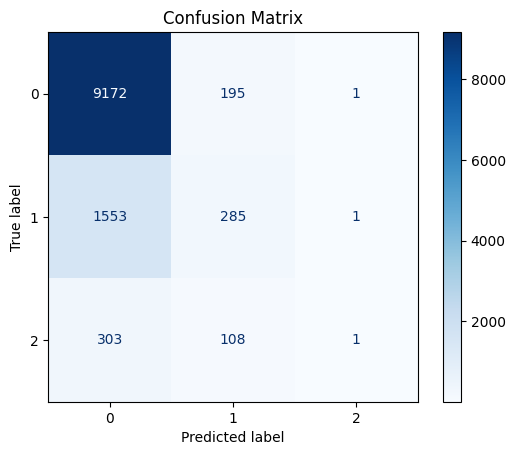

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      9368
           1       0.48      0.15      0.23      1839
           2       0.33      0.00      0.00       412

    accuracy                           0.81     11619
   macro avg       0.55      0.38      0.38     11619
weighted avg       0.76      0.81      0.76     11619



In [68]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(gbc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(gbc.predict(x_test), y_test)

In [69]:
# gbc_params_grid = {
#     'n_estimators': [100, 200],       
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],            
#     'min_samples_split': [2, 5],       
#     'min_samples_leaf': [1, 2],        
#     'subsample': [0.8, 1.0]    
# }


# gbc = GradientBoostingClassifier()

# grid_search = GridSearchCV(
#     estimator=gbc,
#     param_grid=gbc_params_grid,
#     cv=5,
#     scoring='f1_weighted',
#     verbose=2,
#     n_jobs=-1    
# )

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MAE):", grid_search.best_score_)

Training Scores:


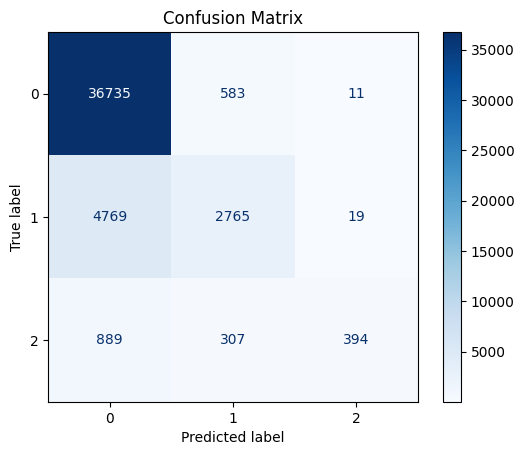

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     37329
           1       0.76      0.37      0.49      7553
           2       0.93      0.25      0.39      1590

    accuracy                           0.86     46472
   macro avg       0.85      0.53      0.60     46472
weighted avg       0.85      0.86      0.83     46472


Testing Scores:


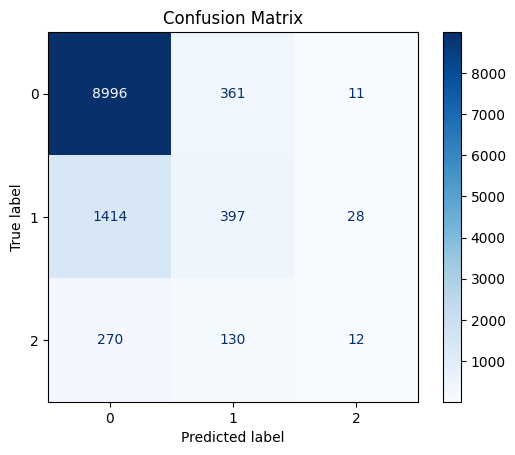

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      9368
           1       0.45      0.22      0.29      1839
           2       0.24      0.03      0.05       412

    accuracy                           0.81     11619
   macro avg       0.51      0.40      0.41     11619
weighted avg       0.76      0.81      0.77     11619



In [70]:
gbc_best_params =  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}

gbc = GradientBoostingClassifier(**gbc_best_params)
gbc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(gbc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(gbc.predict(x_test), y_test)

### XGBoost Classifier

Training Scores:


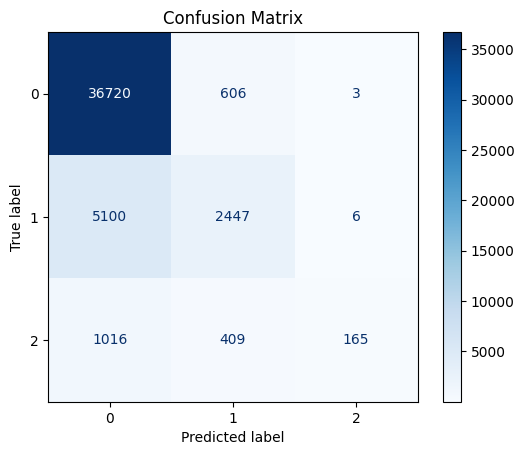

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     37329
           1       0.71      0.32      0.44      7553
           2       0.95      0.10      0.19      1590

    accuracy                           0.85     46472
   macro avg       0.84      0.47      0.52     46472
weighted avg       0.84      0.85      0.81     46472


Testing Scores:


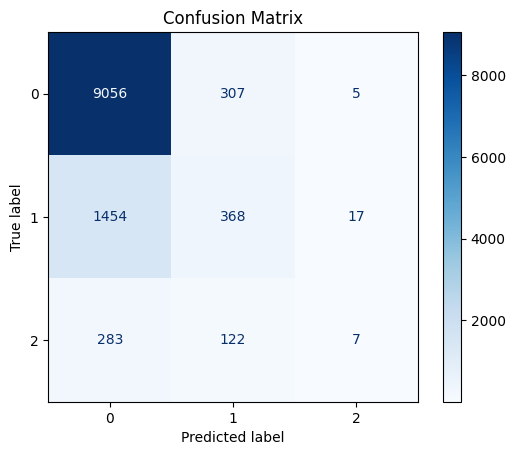

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9368
           1       0.46      0.20      0.28      1839
           2       0.24      0.02      0.03       412

    accuracy                           0.81     11619
   macro avg       0.51      0.39      0.40     11619
weighted avg       0.76      0.81      0.77     11619



In [71]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(xgbc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(xgbc.predict(x_test), y_test)

In [72]:
# xgbc_params_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# model = XGBClassifier(
#     tree_method='hist',      
#     device = "cuda",                             
#     objective='multi:softmax',  
#     num_class=3,                
#     n_jobs=-1,
#     use_label_encoder=False,
#     eval_metric='mlogloss'  
# )

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=xgbc_params_grid,
#     cv=5,
#     scoring='f1_weighted',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MAE):", grid_search.best_score_)

Training Scores:


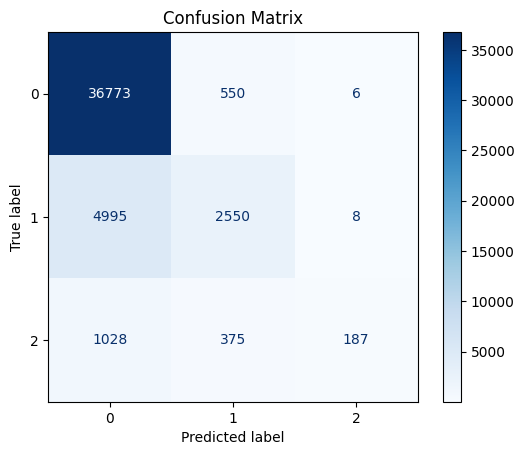

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     37329
           1       0.73      0.34      0.46      7553
           2       0.93      0.12      0.21      1590

    accuracy                           0.85     46472
   macro avg       0.84      0.48      0.53     46472
weighted avg       0.84      0.85      0.82     46472


Testing Scores:


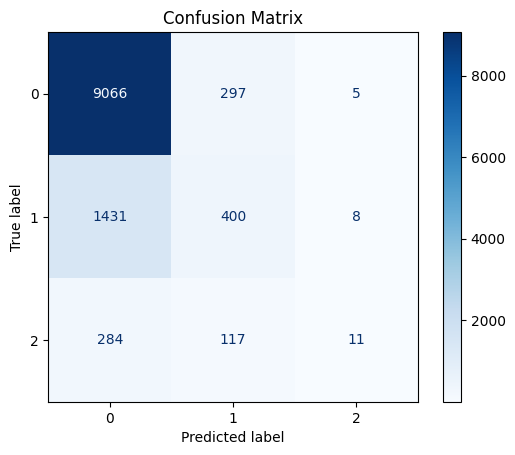

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9368
           1       0.49      0.22      0.30      1839
           2       0.46      0.03      0.05       412

    accuracy                           0.82     11619
   macro avg       0.60      0.40      0.42     11619
weighted avg       0.77      0.82      0.78     11619



In [73]:
xgbc_best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}

xgbc = XGBClassifier(**xgbc_best_params)
xgbc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(xgbc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(xgbc.predict(x_test), y_test)

### Light GBM Classifier 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 46472, number of used features: 17
[LightGBM] [Info] Start training from score -0.219079
[LightGBM] [Info] Start training from score -1.816905
[LightGBM] [Info] Start training from score -3.375116
Training Scores:


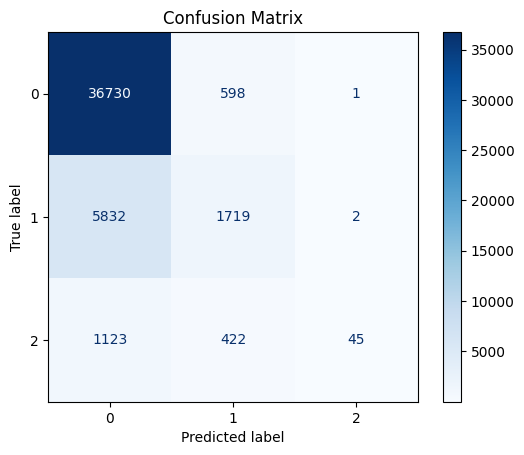

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     37329
           1       0.63      0.23      0.33      7553
           2       0.94      0.03      0.05      1590

    accuracy                           0.83     46472
   macro avg       0.80      0.41      0.43     46472
weighted avg       0.81      0.83      0.78     46472


Testing Scores:


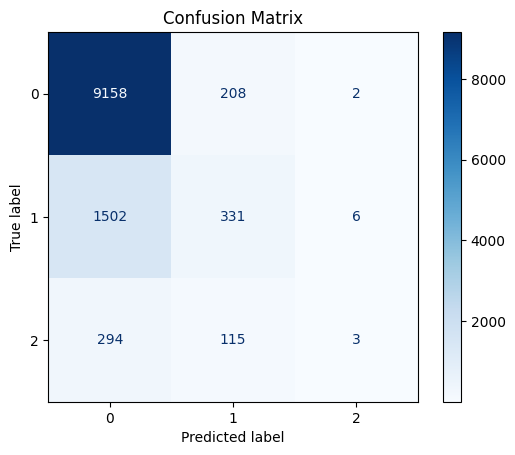

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      9368
           1       0.51      0.18      0.27      1839
           2       0.27      0.01      0.01       412

    accuracy                           0.82     11619
   macro avg       0.54      0.39      0.39     11619
weighted avg       0.76      0.82      0.77     11619



In [74]:
lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(lgbc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(lgbc.predict(x_test), y_test)

In [75]:
# lgbc_params_grid = {
#     'max_depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 300],
#     'subsample': [0.6, 0.8, 1.0]
# }

# model = LGBMClassifier(device='gpu')

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=lgbc_params_grid,
#     cv=5,
#     scoring='f1_weighted',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MAE):", grid_search.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 46472, number of used features: 17
[LightGBM] [Info] Start training from score -0.219079
[LightGBM] [Info] Start training from score -1.816905
[LightGBM] [Info] Start training from score -3.375116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

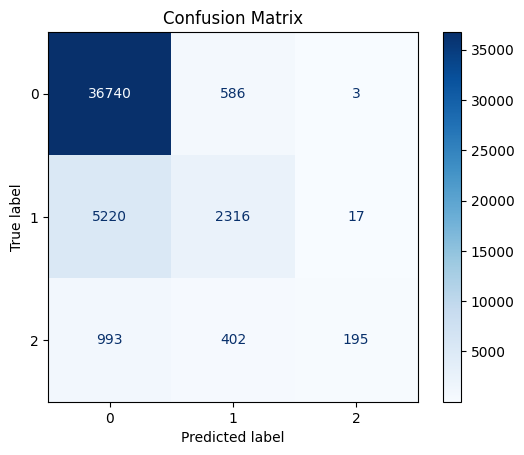

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     37329
           1       0.70      0.31      0.43      7553
           2       0.91      0.12      0.22      1590

    accuracy                           0.84     46472
   macro avg       0.82      0.47      0.52     46472
weighted avg       0.83      0.84      0.81     46472


Testing Scores:


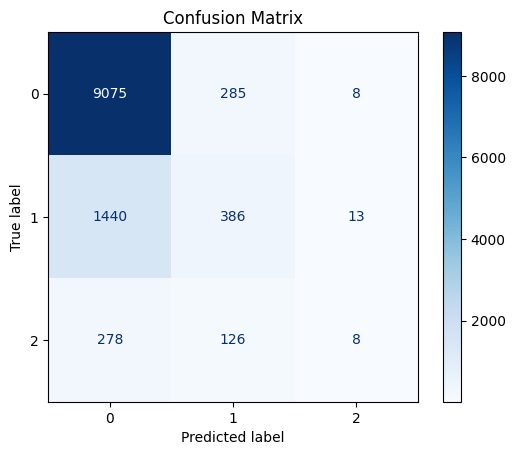

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9368
           1       0.48      0.21      0.29      1839
           2       0.28      0.02      0.04       412

    accuracy                           0.81     11619
   macro avg       0.53      0.40      0.41     11619
weighted avg       0.76      0.81      0.77     11619



In [76]:
lgbc_best_params =  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

lgbmc = LGBMClassifier(**lgbc_best_params)
lgbmc.fit(x_train, y_train)

print("Training Scores:")
model_scoring(lgbmc.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(lgbmc.predict(x_test), y_test)

### Scoring

In [81]:
final_result = pd.DataFrame({'Model':[
    "SVC",
    "SVC without Scaling",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    "XGBoostClassifier",
    "LightGBMClassifier"
    ], 
'Train Score':[
    f1_score(svc.predict(x_train), y_train, average='weighted')*100,
    f1_score(svr_w.predict(x_train), y_train, average='weighted')*100,
    f1_score(dtc.predict(x_train), y_train, average='weighted')*100,
    f1_score(rfc.predict(x_train), y_train, average='weighted')*100,
    f1_score(gbc.predict(x_train), y_train, average='weighted')*100,
    f1_score(xgbc.predict(x_train), y_train, average='weighted')*100,  
    f1_score(lgbmc.predict(x_train), y_train, average='weighted')*100
    ], 
'Test Score':[
    f1_score(svc.predict(x_test), y_test, average='weighted')*100,
    f1_score(svr_w.predict(x_test), y_test, average='weighted')*100,
    f1_score(dtc.predict(x_test), y_test, average='weighted')*100,
    f1_score(rfc.predict(x_test), y_test, average='weighted')*100,
    f1_score(gbc.predict(x_test), y_test, average='weighted')*100,
    f1_score(xgbc.predict(x_test), y_test, average='weighted')*100,
    f1_score(lgbmc.predict(x_test), y_test, average='weighted')*100
    ]
})
final_result

,Model,Train Score,Test Score
0,SVC,48.192285,47.596832
1,SVC without Scaling,89.089629,89.274313
2,DecisionTreeClassifier,99.980630,71.596574
3,RandomForestClassifier,96.565201,79.434605
4,GradientBoostingClassifier,88.306286,84.739827
5,XGBoostClassifier,88.076849,85.622217
6,LightGBMClassifier,87.729844,85.643327


- At last we can say that SVC with scaling is the best algorith for this dataset